In [14]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/Users/samuelleichman/DS-SF-30/unit-project/dataset/dataset-06-storms.csv')

/Users/samuelleichman/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,9,10,11,12,16,17,27,28,29,30,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,1950-04-18,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,1950-04-18,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902295,2.0,2011-11-09,10:21:00 AM,AKS,202.0,AKZ202,AK,BLIZZARD,0.0,NaN,NaN,11/9/2011 0:00:00,05:00:00 PM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,K,0.0,K,AFG,"ALASKA, Northern",NORTHERN ARCTIC COAST - NORTHERN ARCTIC COAST,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0
902296,1.0,2011-11-28,08:00:00 PM,CST,6.0,ALZ006,AL,HEAVY SNOW,0.0,NaN,NaN,11/29/2011 0:00:00,04:00:00 AM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,K,0.0,K,HUN,"ALABAMA, North",MADISON - MADISON,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: An intense upper level low ...,902297.0


In [58]:
df.STATE.unique () # pulls unique datatypes

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR', 'AK', 'ST', 'AS', 'GU',
       'MH', 'VI', 'AM', 'LC', 'PH', 'GM', 'PZ', 'AN', 'LH', 'LM', 'LE',
       'LS', 'SL', 'LO', 'PM', 'PK', 'XX'], dtype=object)

In [59]:
df.STATE.count()

902297

In [17]:
df.EVTYPE.value_counts(ascending=False)

HAIL                              288661
TSTM WIND                         219940
                                   ...  
HURRICANE EMILY                        1
THUNDERSTORM WINDS/FLASH FLOOD         1
Name: EVTYPE, dtype: int64

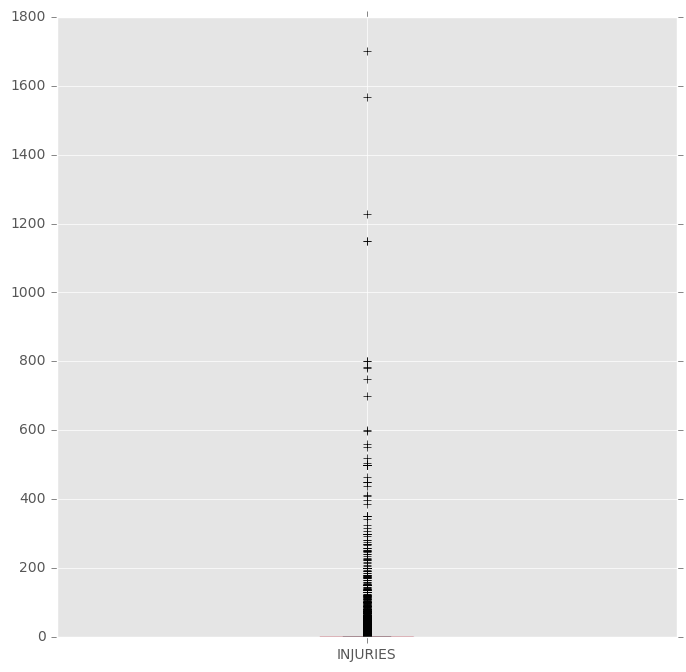

In [16]:
df[['INJURIES']].plot(kind = 'box', figsize = (8, 8))

In [10]:
df['BGN_DATE'] = pd.to_datetime(df['BGN_DATE'])

In [12]:
df.BGN_DATE.dt.year

0         1950
1         1950
2         1951
3         1951
4         1951
5         1951
6         1951
7         1952
8         1952
9         1952
          ... 
902287    2011
902288    2011
902289    2011
902290    2011
902291    2011
902292    2011
902293    2011
902294    2011
902295    2011
902296    2011
Name: BGN_DATE, dtype: int64

In [5]:
pd.crosstab(df.FATALITIES, df.INJURIES, dropna = False)

INJURIES,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,207.0,210.0,215.0,216.0,223.0,224.0,225.0,230.0,234.0,240.0,241.0,246.0,250.0,252.0,257.0,258.0,266.0,270.0,275.0,280.0,293.0,300.0,306.0,316.0,325.0,342.0,350.0,385.0,397.0,410.0,411.0,437.0,450.0,463.0,500.0,504.0,519.0,550.0,560.0,597.0,600.0,700.0,750.0,780.0,785.0,800.0,1150.0,1228.0,1568.0,1700.0
FATALITIES,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,880368,7120,2816,1383,811,596,419,219,198,148,194,80,137,53,55,90,33,42,36,19,76,17,26,14,16,39,21,13,13,8,34,5,11,3,8,9,6,5,5,3,22,4,6,2,2,5,5,4,2,2,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1.0,3390,545,251,128,89,72,70,43,39,19,45,18,27,17,20,25,3,7,5,7,25,3,7,4,10,12,5,3,4,1,16,2,2,4,0,6,3,1,3,1,9,0,1,0,3,3,0,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2.0,561,66,48,24,18,20,23,12,10,9,19,6,9,5,4,13,10,6,5,1,14,7,4,5,4,6,1,2,2,5,7,1,2,1,2,1,1,1,0,2,4,1,1,0,0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3.0,144,13,10,9,7,7,13,2,3,3,5,3,1,4,0,2,3,0,0,1,4,0,1,1,4,4,1,2,3,2,1,0,2,0,0,3,0,2,1,1,2,0,0,0,0,0,0,3,1,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,73,4,2,1,4,5,1,2,2,1,4,1,0,1,4,3,0,1,4,1,2,0,0,1,0,0,2,2,1,0,2,1,1,1,0,1,1,0,0,0,2,1,0,1,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.0,45,2,2,3,1,5,2,0,1,2,2,1,2,3,0,3,1,0,0,0,1,1,1,0,0,2,1,0,0,0,0,1,1,1,0,3,0,2,1,0,2,2,2,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6.0,23,1,0,3,0,2,0,0,0,0,0,0,2,0,0,1,1,0,0,1,2,0,1,1,0,1,0,0,0,0,2,1,0,2,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7.0,21,2,1,0,0,1,0,0,0,1,0,0,2,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8.0,7,1,0,0,0,0,0,2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,1950-04-18,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,1950-04-18,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902295,2.0,2011-11-09,10:21:00 AM,AKS,202.0,AKZ202,AK,BLIZZARD,0.0,NaN,NaN,11/9/2011 0:00:00,05:00:00 PM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,K,0.0,K,AFG,"ALASKA, Northern",NORTHERN ARCTIC COAST - NORTHERN ARCTIC COAST,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0
902296,1.0,2011-11-28,08:00:00 PM,CST,6.0,ALZ006,AL,HEAVY SNOW,0.0,NaN,NaN,11/29/2011 0:00:00,04:00:00 AM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,K,0.0,K,HUN,"ALABAMA, North",MADISON - MADISON,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: An intense upper level low ...,902297.0


In [21]:
df['YEAR'] = df.BGN_DATE.dt.year

In [22]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM,YEAR
0,1.0,1950-04-18,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0,1950
1,1.0,1950-04-18,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902295,2.0,2011-11-09,10:21:00 AM,AKS,202.0,AKZ202,AK,BLIZZARD,0.0,NaN,NaN,11/9/2011 0:00:00,05:00:00 PM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,K,0.0,K,AFG,"ALASKA, Northern",NORTHERN ARCTIC COAST - NORTHERN ARCTIC COAST,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0,2011
902296,1.0,2011-11-28,08:00:00 PM,CST,6.0,ALZ006,AL,HEAVY SNOW,0.0,NaN,NaN,11/29/2011 0:00:00,04:00:00 AM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,K,0.0,K,HUN,"ALABAMA, North",MADISON - MADISON,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: An intense upper level low ...,902297.0,2011


In [31]:
df[['YEAR']]

,YEAR
0,1950
1,1950
...,...
902295,2011
902296,2011


In [60]:
df.FATALITIES.max()

583.0

In [18]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS',
       u'REFNUM'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11263fd10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112712c90>]], dtype=object)

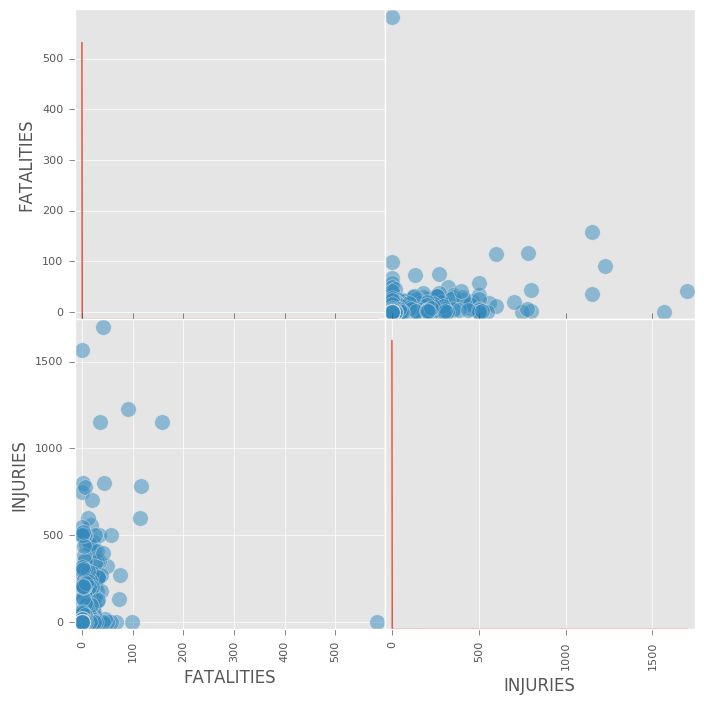

In [6]:
pd.tools.plotting.scatter_matrix(df[ ['FATALITIES', 'INJURIES'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

In [64]:
df = df.dropna(subset = ['WFO', 'CROPDMGEXP']) 

In [65]:
dft.FATALITIES.max()

158.0

In [66]:
df.FATALITIES.max()

158.0

In [54]:
year_1970 = df[df.YEAR == 1970]

In [55]:
year_1970.INJURIES.sum()

1355.0

In [69]:
df[df.FATALITIES == df.FATALITIES.max()]

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM,YEAR
862633,29.0,2011-05-22,04:40:00 PM,CST,97.0,JASPER,MO,TORNADO,2.0,SE,CENTRAL CITY,5/22/2011 0:00:00,05:00:00 PM,0.0,NaN,2.0,SSE,DUENWEG,9.0,1600.0,5.0,0.0,158.0,1150.0,2.8,B,0.0,K,SGF,"MISSOURI, Southwest",...,3703.0,9434.0,3703.0,9424.0,EPISODE NARRATIVE: A strong upper level trough...,862563.0,2011
